# **Baseline System- Nearest Means Classifier**

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve

In [59]:
data_train = pd.read_csv('mushroom_train.csv', usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
data_new_train = data_train.to_numpy()

# One hot encoding

In [60]:
categorical_col = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season','class']
categorical_data_train = data_train[categorical_col]
encoded_data_train = pd.get_dummies(categorical_data_train, prefix = categorical_col, prefix_sep = '_')

**Standardizing the dataset**

In [61]:
numerical_col_train = data_train.select_dtypes(include = ['float64', 'int64'])
scaler = StandardScaler()
numerical_col_scaled_train = scaler.fit_transform(numerical_col_train)
numerical_data_train = pd.DataFrame(numerical_col_scaled_train)

In [62]:
final_data_train = pd.concat([numerical_data_train, encoded_data_train], axis = 1)
print(final_data_train.shape)

(42748, 94)


In [63]:
df_temp = pd.DataFrame({'zeros': [0] * 42748})
df_temp.loc[final_data_train.iloc[:, -2] == 1, 'zeros'] = 0
df_temp.loc[final_data_train.iloc[:, -1] == 1, 'zeros'] = 1

In [64]:
final_data_train = final_data_train.drop(final_data_train.columns[-2:], axis = 1)
print(final_data_train.shape)

(42748, 92)


In [65]:
final_data_train = pd.concat([final_data_train, df_temp], axis = 1)
final_data_train = final_data_train.to_numpy()
print(final_data_train.shape)

(42748, 93)


In [66]:
print(final_data_train.dtype)
print(final_data_train.shape)
print(data_new_train.shape)

float64
(42748, 93)
(42748, 16)


In [67]:
X_train = final_data_train[:, :-1]
Y_train = final_data_train[:, -1]
print(X_train.shape)
print(Y_train.shape)

(42748, 92)
(42748,)


# Nearest Means Classifier

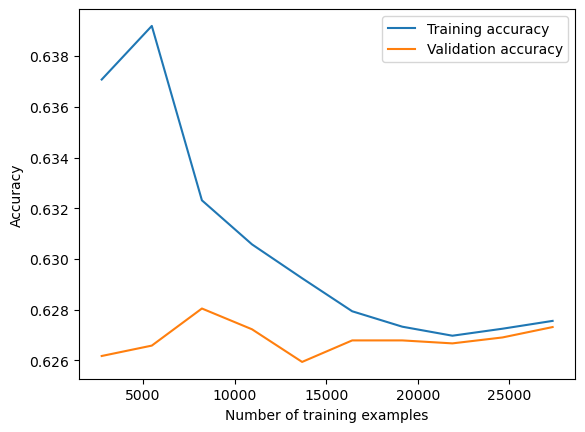

In [77]:
# Define the estimator
clf = NearestCentroid()

# Define the number of training examples to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the training and validation scores for different numbers of training examples
train_sizes, train_scores, val_scores = learning_curve(
    clf, X_train, Y_train, cv=5, train_sizes=train_sizes, scoring='accuracy')

# Compute the mean of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, val_mean, label='Validation accuracy')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

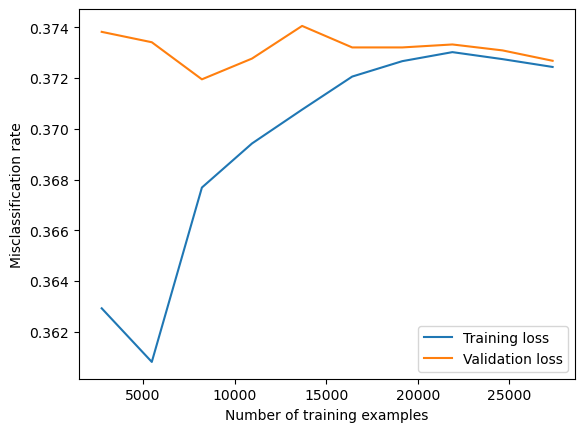

In [76]:
# Define the estimator
clf = NearestCentroid()

# Define the number of training examples to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the training and validation scores for different numbers of training examples
train_sizes, train_scores, val_scores = learning_curve(
    clf, X_train, Y_train, cv=5, train_sizes=train_sizes, scoring='accuracy')

# Compute the mean of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Compute the misclassification rate for the training and validation sets
train_loss = 1 - train_mean
val_loss = 1 - val_mean

# Plot the learning curve
plt.plot(train_sizes, train_loss, label='Training loss')
plt.plot(train_sizes, val_loss, label='Validation loss')
plt.xlabel('Number of training examples')
plt.ylabel('Misclassification rate')
plt.legend(loc='best')
plt.show()

In [69]:
clf = NearestCentroid()  
clf.fit(X_train, Y_train)

NearestCentroid()

In [34]:
# Testing dataset:
data_test = pd.read_csv('mushroom_test.csv', usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

categorical_data_test = data_test[categorical_col]
encoded_data_test = pd.get_dummies(categorical_data_test, prefix = categorical_col, prefix_sep = '_')
print(encoded_data_test.shape)

numerical_col_test = data_test.select_dtypes(include = ['float64', 'int64'])
scaler = StandardScaler()
numerical_col_scaled_test = scaler.fit_transform(numerical_col_test)
numerical_data_test = pd.DataFrame(numerical_col_scaled_test)
print(numerical_data_test.shape)

final_data_test = pd.concat([numerical_data_test, encoded_data_test], axis = 1)
print(final_data_test.shape)

(18321, 91)
(18321, 3)
(18321, 94)


In [35]:
df_temp_test = pd.DataFrame({'zeros': [0] * len(encoded_data_test)})
df_temp_test.loc[encoded_data_test.iloc[:, -2] == 1, 'zeros'] = 0
df_temp_test.loc[encoded_data_test.iloc[:, -1] == 1, 'zeros'] = 1
print(df_temp_test)

       zeros
0          0
1          1
2          1
3          1
4          0
...      ...
18316      1
18317      0
18318      0
18319      0
18320      1

[18321 rows x 1 columns]


In [36]:
final_data_test = final_data_test.drop(final_data_test.columns[-2:], axis = 1)
print(final_data_test.shape)

(18321, 92)


In [37]:
final_data_test = pd.concat([final_data_test, df_temp_test], axis = 1)
final_data_test = final_data_test.to_numpy()
print(final_data_test.shape)

(18321, 93)


In [38]:
print(final_data_test.dtype)
print(final_data_test.shape)

float64
(18321, 93)


In [39]:
X_test = final_data_test[:, :-1]
Y_test = final_data_test[:, -1]

In [40]:
Y_pred = clf.predict(X_test)

In [45]:
accuracy = clf.score(X_test, Y_test)
print("The test accuracy: {:.2f}%".format(accuracy * 100))

The test accuracy: 62.92%


Text(0.5, 1.0, 'Confusion Matrix')

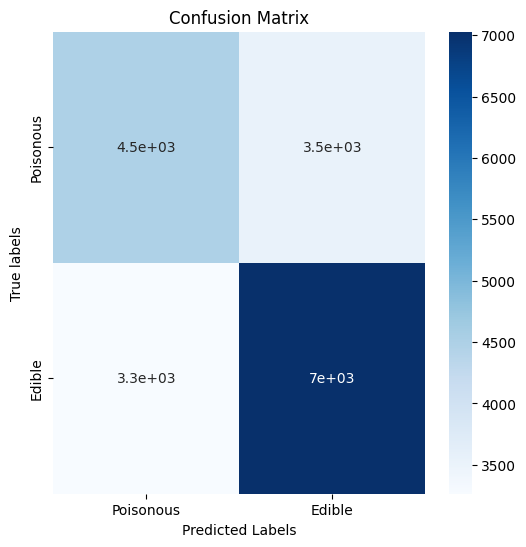

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
classes = ['Poisonous', 'Edible']
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True, cmap = 'Blues', xticklabels = classes, yticklabels = classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

Mean squared error: 37.08%


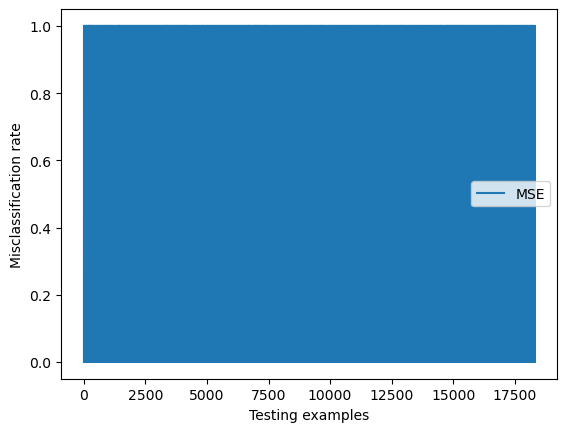

In [75]:
from sklearn.metrics import mean_squared_error

# Define the estimator
clf = NearestCentroid()

# Train the model on the entire training set
clf.fit(X_train, Y_train)

# Evaluate the model on the testing set
Y_pred = clf.predict(X_test)

# Compute the mean squared error between the predicted and true labels
mse = mean_squared_error(Y_test, Y_pred)

print("Mean squared error: {:.2f}%".format(mse * 100))

# Plot the MSE curve
plt.plot(np.arange(len(Y_test)), Y_test != Y_pred, label='MSE')
plt.xlabel('Testing examples')
plt.ylabel('Misclassification rate')
plt.legend(loc='best')
plt.show()